In [2]:
%matplotlib inline

from sklearn import datasets

# 线性回归(Linear Regression)

- 一元线性回归
- 多元线性回归：
    1. 多项式回归(Polynomial Regression)
    2. 曲线回归(Curvilinear Regression)

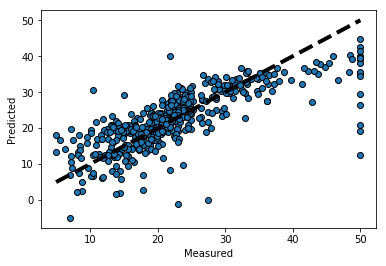

In [3]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

boston = datasets.load_boston()
lr = linear_model.LinearRegression()

X = boston.data
y = boston.target

predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)

ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# 逻辑回归

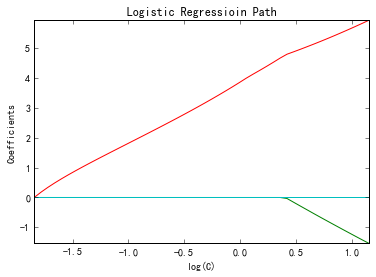

In [8]:
import numpy as np
from sklearn.svm import l1_min_c
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X -= np.mean(X, 0)

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 3)
clf = linear_model.LogisticRegression(C=1.0, penalty="l1", tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
    
coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_)
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regressioin Path")
plt.axis("tight")
plt.show()

# 决策树

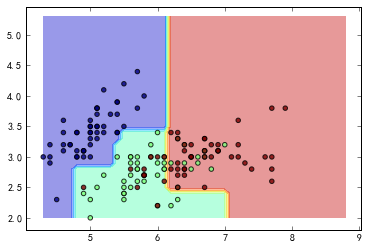

In [11]:
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# 限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

# 画图
x_min, x_max = X[:, 0].min(), X[:, 0].max() + 1
y_min, y_max = X[:, 1].min(), X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

In [13]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

AttributeError: 'NoneType' object has no attribute 'write'